Title

Preliminary Data Analysis

In [102]:
install.packages("janitor")

library(tidyverse)
library(repr)
library(rvest)
library(stringr)
library(janitor)
library(repr)
library(tidymodels)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [103]:
#Our dataset can successfully be loaded into R

stroke <- read_csv('stroke_prediction_dataset.csv') |> clean_names()

Rows: 15000 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): Patient Name, Gender, Marital Status, Work Type, Residence Type, S...
dbl  (8): Patient ID, Age, Hypertension, Heart Disease, Average Glucose Leve...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [104]:
# Our data is tidy. Each value is atomic. 

glimpse(stroke)

Rows: 15,000
Columns: 22
$ patient_id               <dbl> 18153, 62749, 32145, 6154, 48973, 29307, 2552…
$ patient_name             <chr> "Mamooty Khurana", "Kaira Subramaniam", "Dhan…
$ age                      <dbl> 56, 80, 26, 73, 51, 62, 40, 61, 72, 82, 41, 7…
$ gender                   <chr> "Male", "Male", "Male", "Male", "Male", "Fema…
$ hypertension             <dbl> 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, …
$ heart_disease            <dbl> 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, …
$ marital_status           <chr> "Married", "Single", "Married", "Married", "D…
$ work_type                <chr> "Self-employed", "Self-employed", "Never Work…
$ residence_type           <chr> "Rural", "Urban", "Rural", "Urban", "Urban", …
$ average_glucose_level    <dbl> 130.91, 183.73, 189.00, 185.29, 177.34, 91.60…
$ body_mass_index_bmi      <dbl> 22.37, 32.57, 20.32, 27.50, 29.06, 37.47, 28.…
$ smoking_status           <chr> "Non-smoker", "Non-smoker", "Formerly Smoked"…
$ alcohol_intak

In [105]:
# Creating the Training Data. 

set.seed(100)

stroke <- stroke |> mutate(diagnosis = as_factor(diagnosis))  

stroke_split <- initial_split(stroke, prop = 0.75, strata = diagnosis) 
stroke_train <- training(stroke_split) 
stroke_test <- testing(stroke_split)


In [106]:
#There is an equal amount of diagnosis variables in each data set. The training set has 75% of the values.

stroke_train |> group_by(diagnosis) |> 
    summarise(count = n())

stroke_test |> group_by(diagnosis) |> 
    summarise(count = n())

sum(is.na(stroke_train)) #there are 1873 missing values in the training data set. 

diagnosis,count
<fct>,<int>
Stroke,5601
No Stroke,5649


diagnosis,count
<fct>,<int>
Stroke,1867
No Stroke,1883


[1] 1873

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


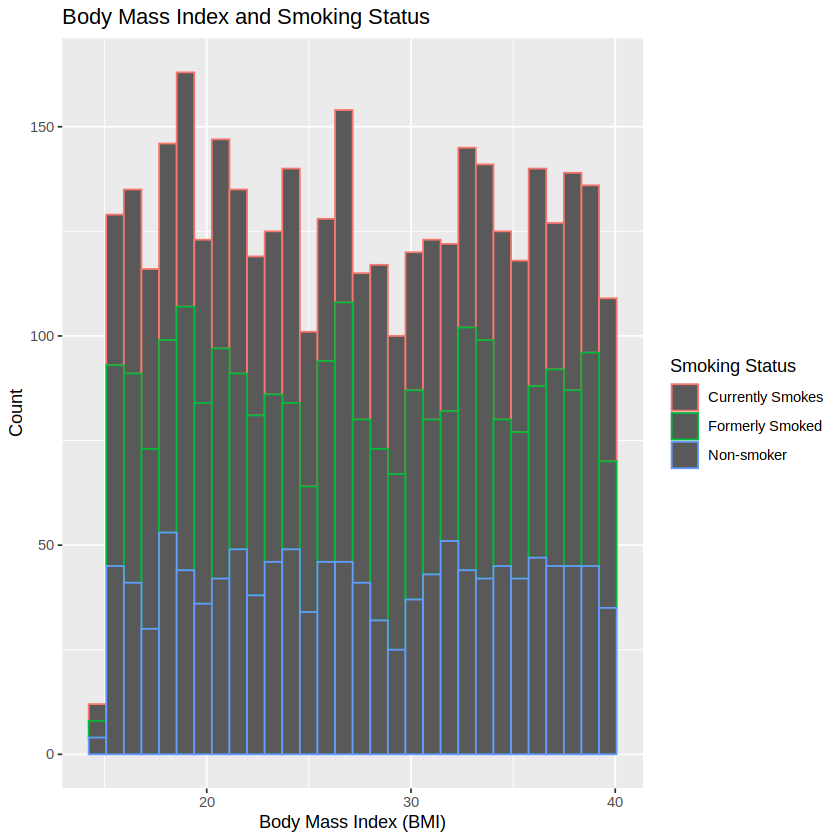

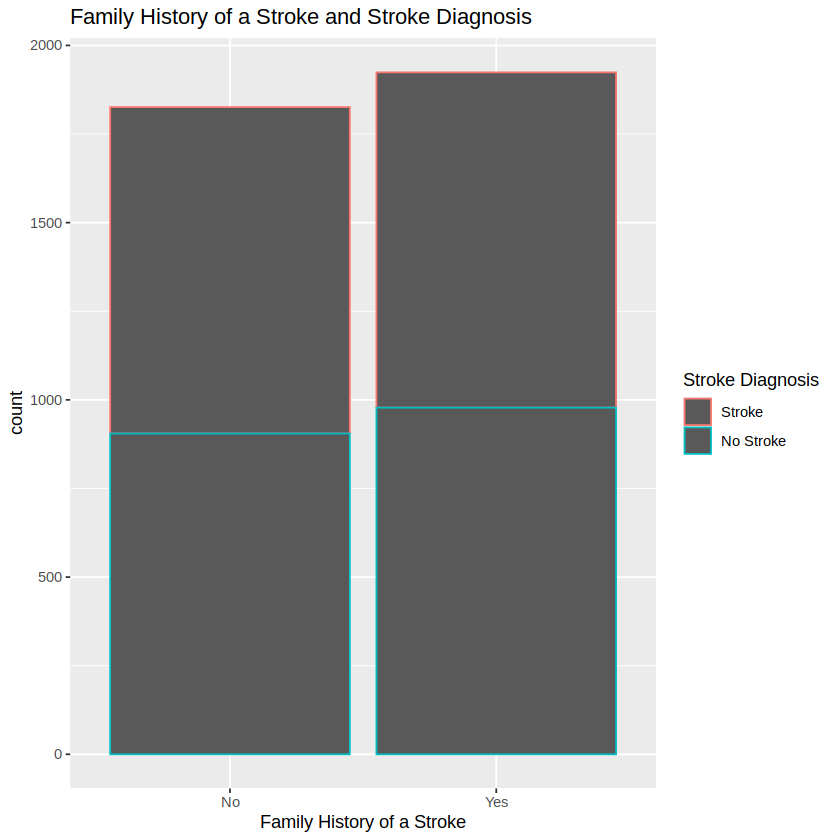

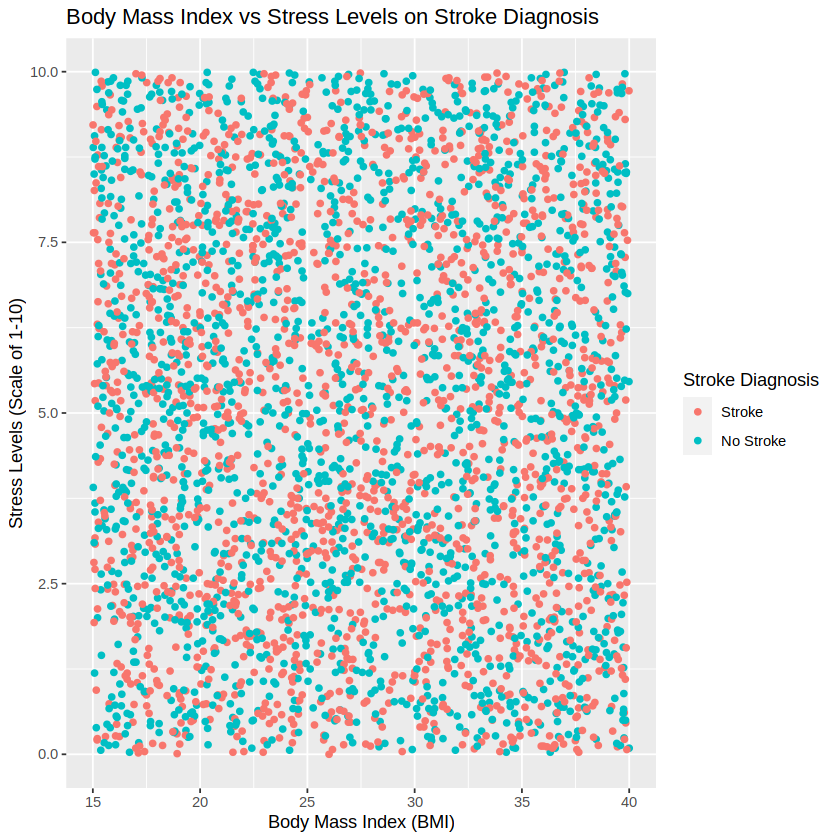

In [113]:
#Here are some plots that represent our dataset. 

stroke_plot <- ggplot(stroke_test, aes(x = body_mass_index_bmi, color = smoking_status)) + 
    geom_histogram() + 
    labs(x = 'Body Mass Index (BMI)', y = 'Count', color = 'Smoking Status') + 
    ggtitle('Body Mass Index and Smoking Status')

stroke_plot2 <- ggplot(stroke_test, aes(x = family_history_of_stroke, color = diagnosis)) + 
    geom_bar() + 
    labs(x = 'Family History of a Stroke', color = 'Stroke Diagnosis') + 
    ggtitle('Family History of a Stroke and Stroke Diagnosis')

stroke_plot3 <- ggplot(stroke_test, aes(x = body_mass_index_bmi, y = stress_levels, color = diagnosis)) + 
    geom_point() + 
    labs(x = 'Body Mass Index (BMI)', y = 'Stress Levels (Scale of 1-10)', color = 'Stroke Diagnosis') +
    ggtitle('Body Mass Index vs Stress Levels on Stroke Diagnosis')

stroke_plot
stroke_plot2
stroke_plot3

ERROR: Error in parse(text = x, srcfile = src): <text>:1:8: unexpected symbol
1: import mitosheet
           ^
